In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
df.shape

(303, 14)

In [26]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [27]:
r1 = df['output'].value_counts()
r1

1    165
0    138
Name: output, dtype: int64

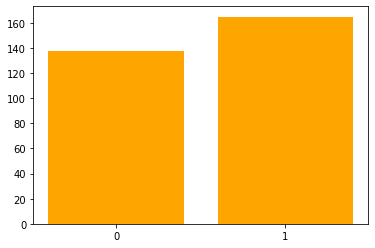

In [28]:
plt.bar(r1.index,r1.values,color='orange')
plt.xticks([0,1])
plt.show()

In [29]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [30]:
df.duplicated().sum()  # no of duplicate rows = 1

1

In [31]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [32]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(303, 13)
(303,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [33]:
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [34]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
print(x.shape)
print(y.shape)
print(303*0.25)

(303, 13)
(303,)
75.75


In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(227, 13)
(76, 13)
(227,)
(76,)


In [38]:
x_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2


### Model Building

In [39]:
x_train.shape

(227, 13)

In [40]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense

In [41]:
m1 = Sequential()                                  # Input layer has 13 neurons
m1.add(Dense(32,activation='relu',input_dim=13))   # H1 has 32 neurons
m1.add(Dense(24,activation='relu'))                # H2 has 24 neurons
m1.add(Dense(8,activation='relu'))                 # H3 has 8 neurons
m1.add(Dense(1,activation='sigmoid'))              # Output layer has 1 neuron

m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
8/8 [==============================] - 1s 32ms/step - loss: 1.5121 - accuracy: 0.4537 - val_loss: 1.2204 - val_accuracy: 0.5395
Epoch 2/15
8/8 [==============================] - 0s 20ms/step - loss: 0.7838 - accuracy: 0.6167 - val_loss: 0.8822 - val_accuracy: 0.5263
Epoch 3/15
8/8 [==============================] - 0s 8ms/step - loss: 0.7191 - accuracy: 0.6388 - val_loss: 0.7276 - val_accuracy: 0.6447
Epoch 4/15
8/8 [==============================] - 0s 16ms/step - loss: 0.6674 - accuracy: 0.6344 - val_loss: 0.7129 - val_accuracy: 0.6184
Epoch 5/15
8/8 [==============================] - 0s 7ms/step - loss: 0.5726 - accuracy: 0.7093 - val_loss: 0.7311 - val_accuracy: 0.5921
Epoch 6/15
8/8 [==============================] - 0s 6ms/step - loss: 0.5665 - accuracy: 0.6828 - val_loss: 0.6955 - val_accuracy: 0.6711
Epoch 7/15
8/8 [==============================] - 0s 6ms/step - loss: 0.5810 - accuracy: 0.6740 - val_loss: 0.6956 - val_accuracy: 0.5921
Epoch 8/15
8/8 [===============

In [43]:
print(type(h1.history))
print(h1.history.keys())
print(h1.params)
print(h1.epoch)

<class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
{'verbose': 1, 'epochs': 15, 'steps': 8}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [44]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
10,0.570211,0.704846,0.662286,0.631579,10
11,0.577951,0.713656,0.666691,0.618421,11
12,0.585966,0.647577,0.684312,0.644737,12
13,0.554429,0.726872,0.688249,0.578947,13
14,0.556243,0.718062,0.648133,0.618421,14


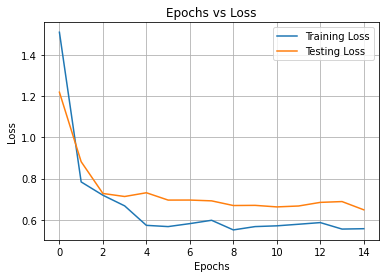

In [45]:
plt.plot(r1['Epochs'],r1['loss'],label='Training Loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend()
plt.grid()
plt.show()

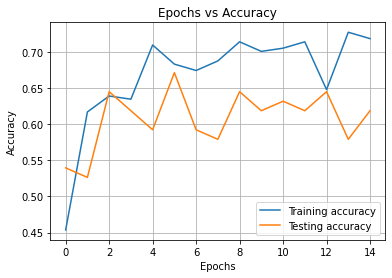

In [46]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.legend()
plt.grid()
plt.show()

In [47]:
ypred = m1.predict(x_test)
print(ypred)

[[0.9174683 ]
 [0.6471713 ]
 [0.5710916 ]
 [0.39278847]
 [0.7793978 ]
 [0.4266444 ]
 [0.7377232 ]
 [0.5911607 ]
 [0.8987058 ]
 [0.1370811 ]
 [0.7939254 ]
 [0.17250438]
 [0.6047889 ]
 [0.43563774]
 [0.8824855 ]
 [0.6960741 ]
 [0.5241644 ]
 [0.6289165 ]
 [0.19436781]
 [0.4589875 ]
 [0.52860296]
 [0.74861753]
 [0.3959496 ]
 [0.1985639 ]
 [0.12682815]
 [0.76714253]
 [0.47467163]
 [0.5936844 ]
 [0.60801935]
 [0.02996276]
 [0.49802676]
 [0.20210183]
 [0.2876865 ]
 [0.837117  ]
 [0.6985737 ]
 [0.82029146]
 [0.58477086]
 [0.6696037 ]
 [0.22057764]
 [0.5788197 ]
 [0.58445156]
 [0.7146798 ]
 [0.3040797 ]
 [0.50903094]
 [0.81381965]
 [0.7188978 ]
 [0.09575672]
 [0.6438062 ]
 [0.5008786 ]
 [0.5448409 ]
 [0.6606509 ]
 [0.20881097]
 [0.4162658 ]
 [0.65723264]
 [0.5185521 ]
 [0.4344661 ]
 [0.8668241 ]
 [0.23399463]
 [0.44418466]
 [0.5531649 ]
 [0.161082  ]
 [0.49007532]
 [0.283894  ]
 [0.2159173 ]
 [0.6414382 ]
 [0.01538061]
 [0.92137635]
 [0.7477457 ]
 [0.6509888 ]
 [0.5261646 ]
 [0.64145064]
 [0.64

In [54]:
ypred_m1 = [1 if i>0.5 else 0 for i in ypred]
print(ypred_m1)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]


In [56]:
res1 = pd.DataFrame({'y_test':y_test,'y_pred':[*ypred_m1]})
res1.head()

,y_test,y_pred
80,1,1
270,0,1
55,1,1
48,1,0
108,1,1


In [50]:
# print(y_test)

In [51]:
from sklearn.metrics import confusion_matrix,classification_report

In [52]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[18 17]
 [12 29]]
              precision    recall  f1-score   support

           0       0.60      0.51      0.55        35
           1       0.63      0.71      0.67        41

    accuracy                           0.62        76
   macro avg       0.62      0.61      0.61        76
weighted avg       0.62      0.62      0.61        76

